In [1]:
import cv2
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import os

In [2]:
estaciones = []

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"\nCoordenadas seleccionadas: ({x}, {y})")
        nombre = input("Ingrese el nombre de la estación: ").strip()
        linea = input("Ingrese el número de línea: ").strip()
        
        estaciones.append({
            'coordenadas': (x, y),
            'nombre': nombre,
            'linea': linea
        })
        
        # Actualizar imagen con marcador
        cv2.circle(img_display, (x, y), 15, (255, 0, 0), -1)
        plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
        plt.show()

In [4]:
# Cargar imagen
img_path = 'metro.jpg'
if not os.path.exists(img_path):
    raise FileNotFoundError(f"No se encontró la imagen en {img_path}")

img = cv2.imread(img_path)
if img is None:
    raise ValueError("Error al cargar la imagen. Verifica el formato")

In [5]:
# Redimensionar para Jupyter (ajustar según necesidad)
scale_percent = 20  # 20% del tamaño original
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

In [6]:
# Crear copia para mostrar
img_display = img_resized.copy()

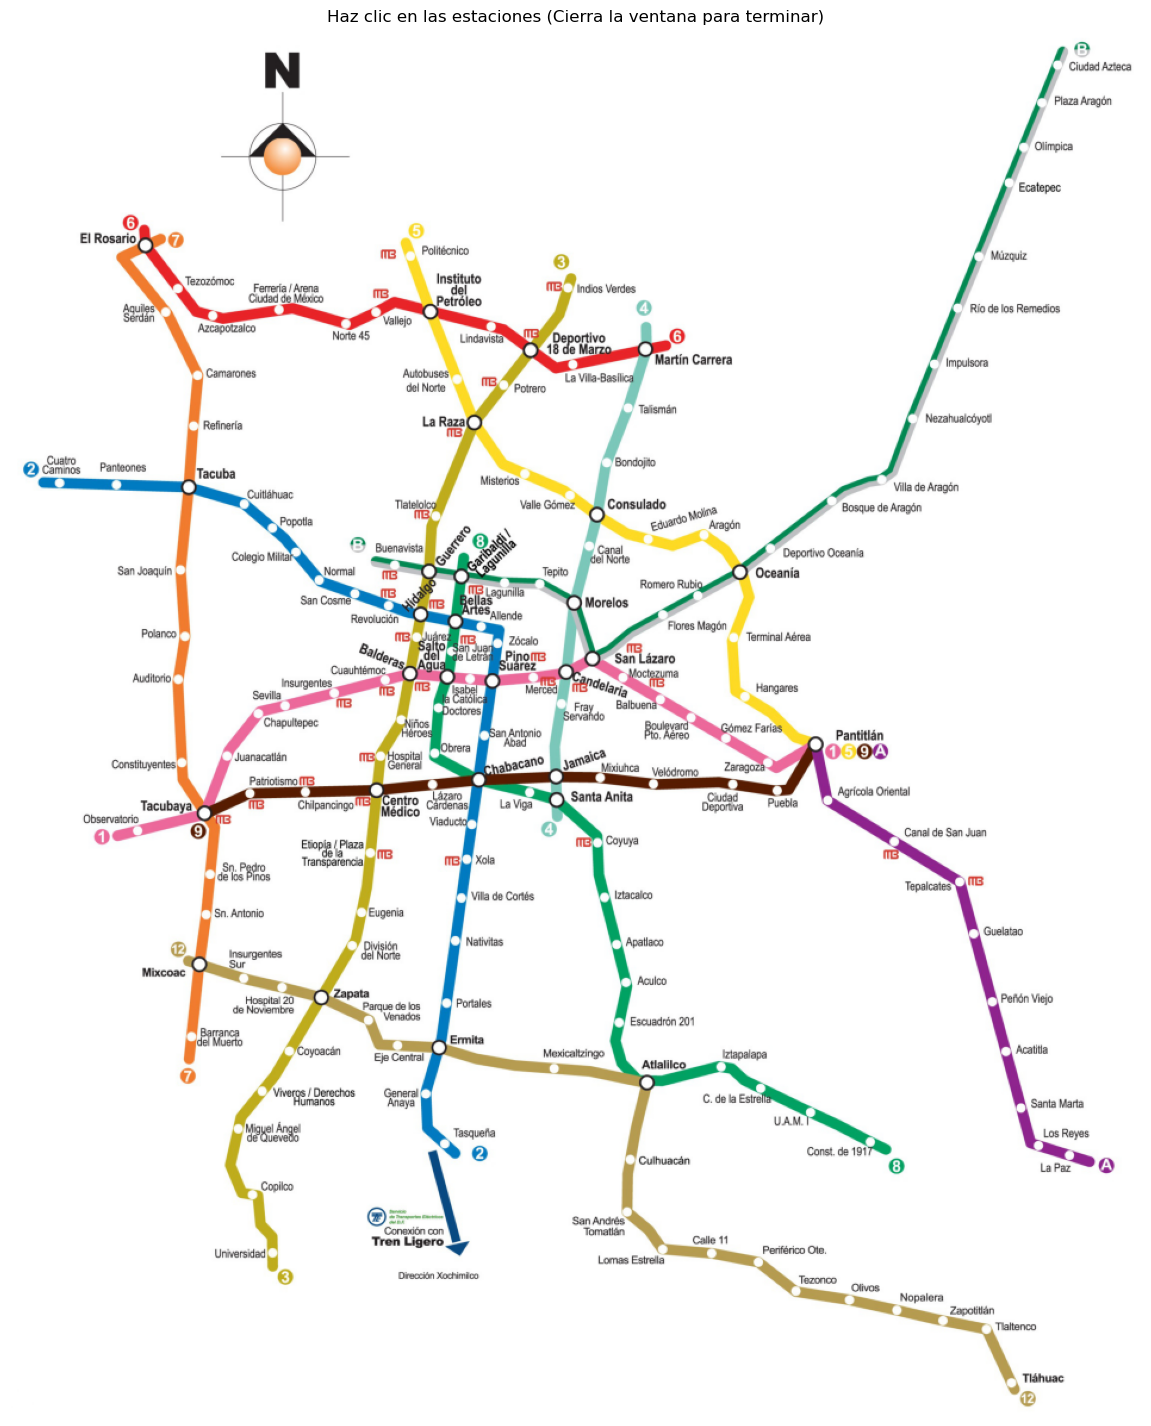

In [11]:
# Mostrar imagen con matplotlib
plt.figure(figsize=(15, 18))
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title("Haz clic en las estaciones (Cierra la ventana para terminar)")
plt.axis('off')
plt.connect('button_press_event', click_event)
plt.show()

In [12]:
# Generar CSV
if estaciones:
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"metro_coordenadas_{timestamp}.csv"
    
    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        
        # Escribir dimensiones originales
        writer.writerow(["Dimensiones originales de la imagen"])
        writer.writerow(["Ancho (px)", "Alto (px)"])
        writer.writerow([img.shape[1], img.shape[0]])
        writer.writerow([])
        
        # Escribir datos
        writer.writerow(["Línea", "Estación", "X Original", "Y Original"])
        for estacion in estaciones:
            # Calcular coordenadas originales
            x_orig = int((estacion['coordenadas'][0] / width) * img.shape[1])
            y_orig = int((estacion['coordenadas'][1] / height) * img.shape[0])
            
            writer.writerow([
                estacion['linea'],
                estacion['nombre'],
                x_orig,
                y_orig
            ])

    print(f"\nDatos guardados en {filename}")
    print("Coordenadas convertidas al tamaño original:")
    for estacion in estaciones:
        print(f"{estacion['nombre']}: ({x_orig}, {y_orig})")
else:
    print("\nNo se registraron estaciones")


No se registraron estaciones
